# Predicting heart disease using machine learning
This notebook looks into using various python machine learning and data science libraries in an attempt to build a machine
learning model capable of predicting wheather or not some has heart disease based on their medical attributes.

we are going to take the following approahes:
1. problem defination
2. data
3. evaluation
4. features
5. Modeling
6. Experimentation


# 1. Problem defination
> given clinical parameters about a patient, can we predict wheather or not they have heart disease

# 2.Data
 The original data came from the cleavland data from uci machine learning respiratory: https://archive.ics.uci.edu/dataset/45/heart+disease

# 3. Evaluation
If we can reach 95% accuracy at predicting wheather or not a patient has heart disease during the proof of concept , we will pursue with the project.

# 4. Features
**Data dictionary**
* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute


## preparing the tools

In [1]:
## Import all the  tools we need
## Regular EDA and plotting tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn import datasets, metrics, model_selection, svm

## load the data

In [2]:
df=pd.read_csv("heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape #(rows,columns)

(303, 14)

## Data Explorataion (Explotary data analysis-EDA)
The goal here is to find more about the data and become subejct matter expert on the data set we are working on
1. what question are we trying to solve ?
2. what kinda data we have and how we trat differnt data type?
3. whats missing in the data and how do we deal with them?
4. where are the outliers and why should we care about them?
5. How can we add, change or remove features to gert more out of our data?

In [4]:
# lets find out how many each of the classes are there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

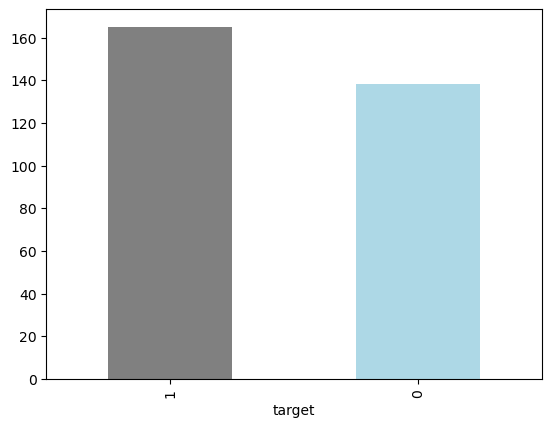

In [5]:
df["target"].value_counts().plot(kind="bar", color=["gray","lightblue"])
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease frequency according to sex

In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
## compare target column with sex columnn
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


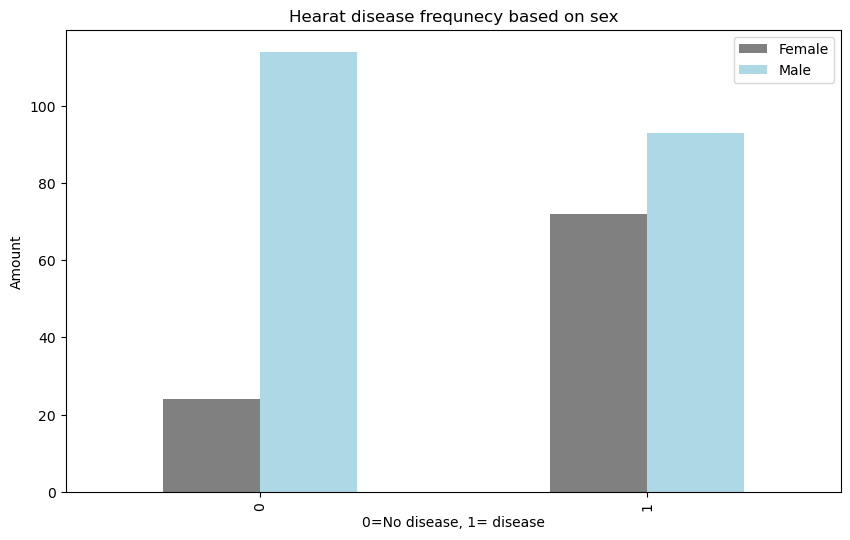

In [11]:
## plot the cross tab
pd.crosstab(df.target,df.sex).plot(kind="bar", figsize=(10,6), color=["gray", "lightblue"])
plt.title("Hearat disease frequnecy based on sex")
plt.xlabel("0=No disease, 1= disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.show()

## age vs max heart rate for heart disease

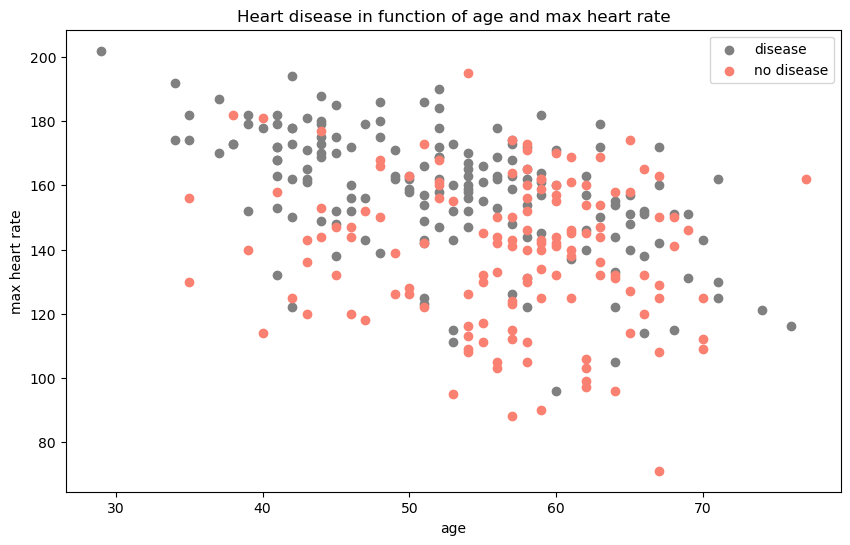

In [12]:
## create another figure
plt.figure(figsize=(10,6))

# scatter with positive example
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="gray")

#scatter with negative example
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="salmon")

## customize plot
plt.title("Heart disease in function of age and max heart rate")
plt.xlabel("age")
plt.ylabel("max heart rate")
plt.legend(["disease","no disease"])

plt.show()

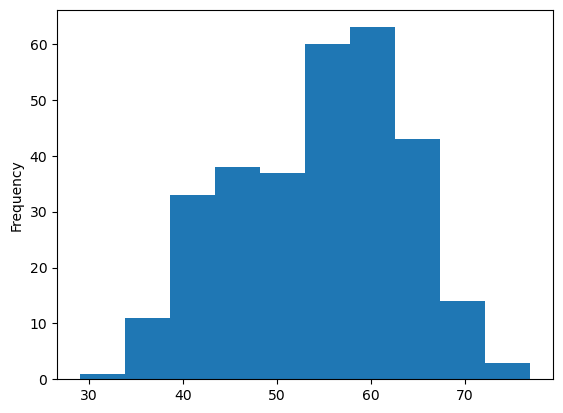

In [13]:
# check the distribution of the age column with a histogram
df.age.plot.hist()
plt.show()

# heart_disease frequency per chest pain type

In [14]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


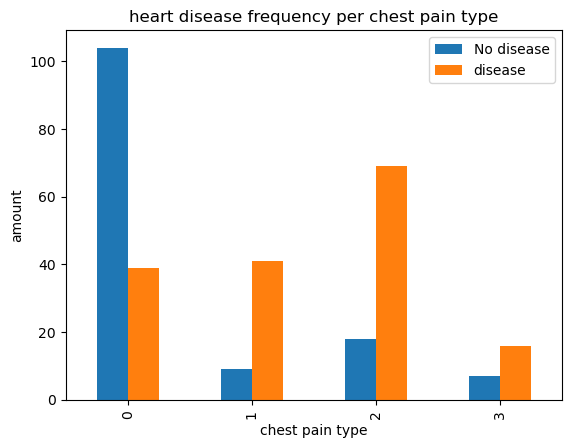

In [15]:
# make the crosstab more visible
pd.crosstab(df.cp,df.target).plot(kind="bar")
#customize the plot
plt.title("heart disease frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["No disease", "disease"])
plt.show()

In [16]:
## make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


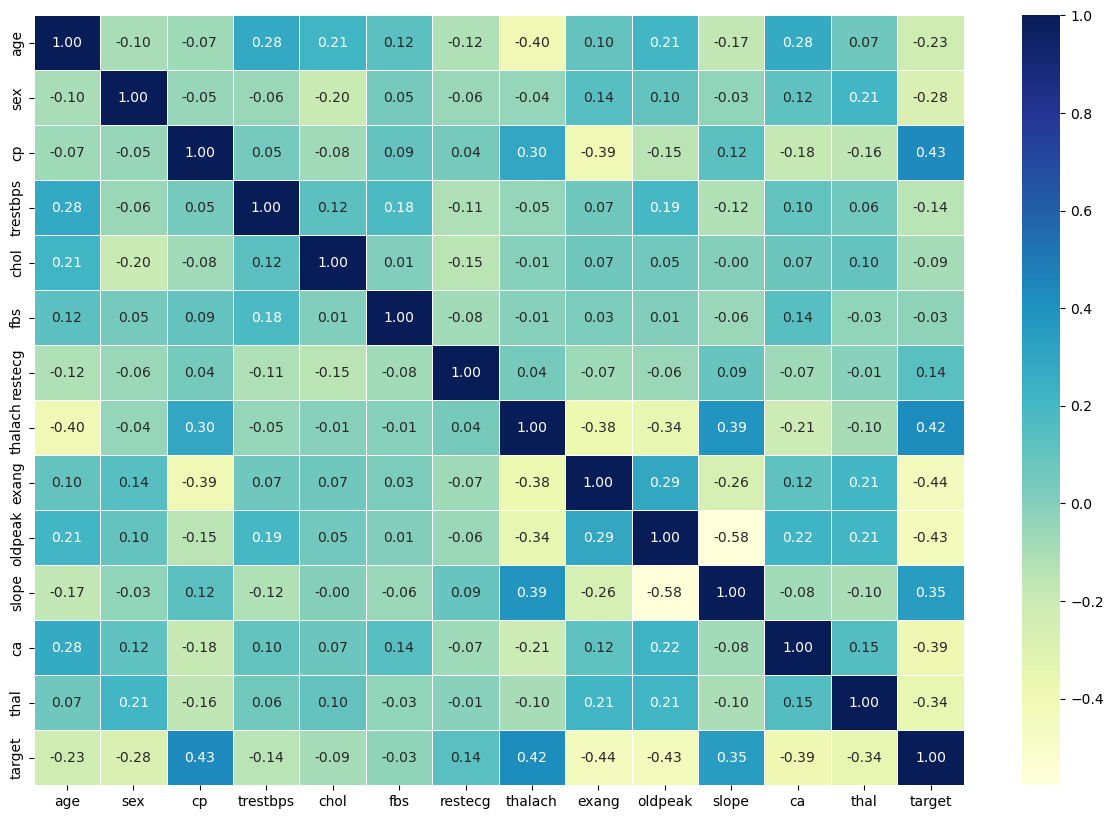

In [17]:
## import seaborn
import seaborn as sns
##  make correlation matrix more visible
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu")
plt.show()

## Modeling

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
## split the data into X and y
np.random.seed(42)
X=df.drop("target", axis=1)
y=df["target"]
## split the data into train and test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## we are going to try three machine learning model
1. LogisticRegression
2. KNeighborsClassifier
3. RandomForestClassifier

In [20]:
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

C:\Users\pc\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:

model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

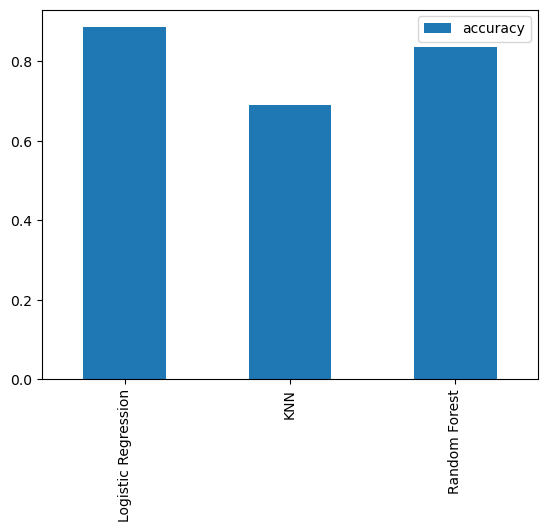

In [22]:
model_compare=pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.show()

Now we gota a baseline model. we know that the model's first prediction aren't always based on which we should take our next steps.
Now lets do the following
1. Hyperparameter tuning
2. feature importance
3. confusion matrix
4. cross validation
5. precisiom
6. recall
7. f1 score
8. Classification report
9. ROC curve

# Hyperparameter tuning (by hand)

In [29]:
## Tuning KNN
train_scores=[]
test_scores=[]

#create a list of different values for n_neighbors
neighbors=range(1,21)

##setup KNN instances
knn=KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # fit the algorithm
    knn.fit(X_train,y_train)
    ## update the training score list
    train_scores.append(knn.score(X_train,y_train))
    ## update the test score list
    test_scores.append(knn.score(X_test,y_test))

In [30]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [31]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data:75.41%


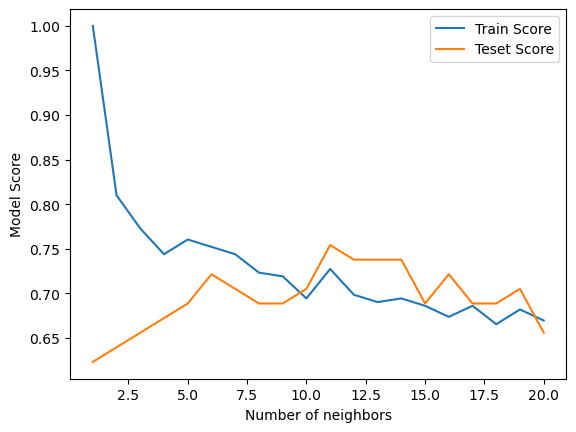

In [36]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Teset Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")
plt.show()

## Hyper parameter tuning with Randomizedsearch CV

we are going to tune
* Logistic Regression
* RandomForestclassifier

In [41]:
## create hyperparameter grid  for logistic regression

log_reg_grid={"C": np.logspace(-4,4,20),
             "solver":["liblinear"]}
# creat hyperparameter grid for Randomforest classifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(1,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

Now we have got hyperparameter grid for each of our models. let's tune them using Randomized search CV

In [42]:
## Tune logistic regression
np.random.seed(42)

## set up random hyper parameter seach for logistic regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

# fit
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [43]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [44]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [46]:
## Tune randomForestClassifier
np.random.seed(42)
## set up random hyper parameter search for randomforestclassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

#fit
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\pc\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pc\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\pc\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [47]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 3,
 'min_samples_leaf': 13,
 'max_depth': 5}

In [48]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [49]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyper parameter tuning with GridSearchCV
since LogsiticRegression provides the best score so far, we will try to improve them by GridSearchCV

In [51]:
## create hyperparameter grid for LogisticRegression
log_reg_grid={"C": np.logspace(-4,4,30),
             "solver":["liblinear"]}
## setup grid hyperparameter search for LogisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),
                     param_grid=log_reg_grid,
                     cv=5,
                     verbose=True)

#3 fit
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [52]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [53]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evalute our tuned machine learning classifiers beyond accuracy
* ROC curve and AUC score
* Confusion Matrix
* Classifiction report
* precision
* recall
* F1-score

will try to use cross validation where possible

to make comparison and evaluate our trained model we need to make predictions

In [54]:
# make prediction with tuned model
y_preds=gs_log_reg.predict(X_test)

In [55]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [56]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [73]:
## plot ROC curve and calculate AUC metric
from sklearn.metrics import plot_roc_curve

plot_roc_curve(gs_log_reg, X_test,y_test)

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\pc\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\metrics\__init__.py)

In [68]:
from sklearn.metrics import RocCurveDisplay

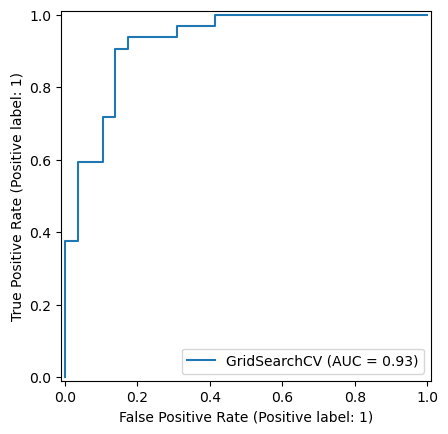

In [72]:
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test)
plt.show()

In [74]:
## Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


In [75]:
sns

<module 'seaborn' from 'C:\\Users\\pc\\Desktop\\heart-disease-project\\env\\Lib\\site-packages\\seaborn\\__init__.py'>

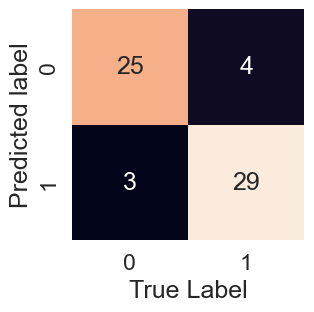

In [79]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    plots a nice looking confusion matrix using seaborn's heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")

    
plot_conf_mat(y_test,y_preds)
plt.show()

In [80]:
## classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation matrix using cross validation
we will calculate accuracy precision, recall and f1 score using cross validation and to do that we will use cross_val_score()

In [86]:
# import cross_val_score
from sklearn.model_selection import cross_val_score

#check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [83]:
## create a new classifer with best params
clf=LogisticRegression(C= 0.20433597178569418,
                      solver="liblinear")

In [87]:
## cross validated accuracy
cv_acc=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="accuracy")

In [88]:
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [90]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [91]:
## cross validated precision
cv_precision=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="precision")

In [92]:
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [99]:
cv_precision=np.mean(cv_precision)
cv_precision

0.8673007976269721

In [103]:
## cross validated precision
cv_recall=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="recall")
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [105]:
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [96]:
## cross validated f1 score
cv_f1=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="f1")

In [97]:
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [98]:
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

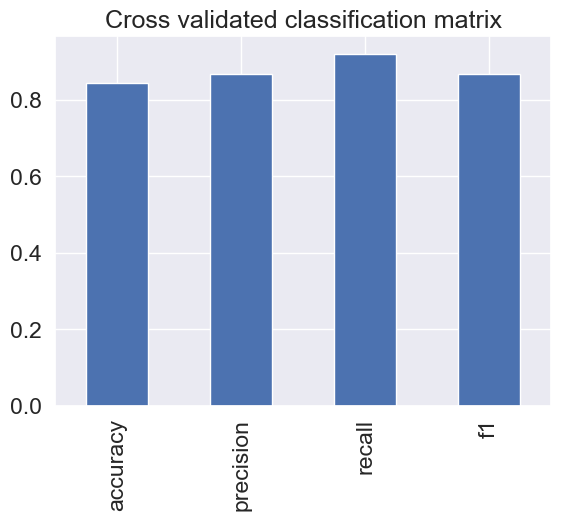

In [108]:
# visualize the cross validated metrics
cv_metrics=pd.DataFrame({"accuracy": cv_acc,
                        "precision": cv_precision,
                        "recall":cv_recall,
                        "f1": cv_f1},
                       index=[0])

cv_metrics.T.plot.bar(title="Cross validated classification matrix",legend=False)
plt.show()

## feature importance
which features contributes most to the outcomes of the model and how did the contribute

one way to find feature importance is to search for "(Model Name) feature importance"

In [110]:
#fit an instance of LogisticRegression
clf=LogisticRegression(C=0.20433597178569418,
                      solver="liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [111]:
#check coef
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [112]:
#match coef's of features to column
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

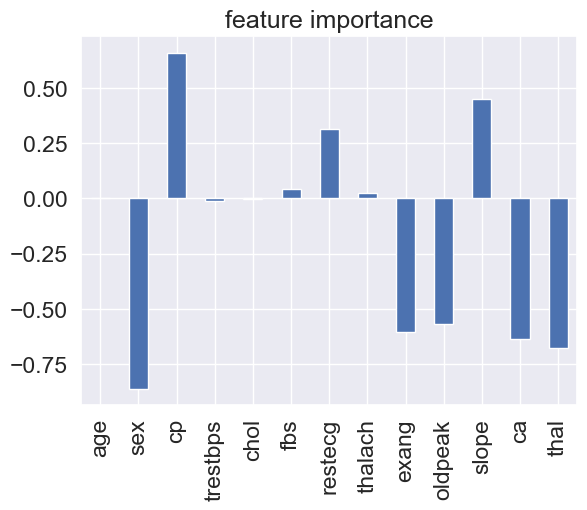

In [117]:
#visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="feature importance", legend=False)
plt.show()

In [120]:
## save model
import pickle

# save
with open('heart-disease-project.pkl','wb') as f:
    pickle.dump(clf,f)